<a href="https://colab.research.google.com/github/shobhitsundriyal/Revisit_ML/blob/master/0%20Info_AI_Lab_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget "http://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data"

--2020-12-26 16:03:54--  http://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76467 (75K) [application/x-httpd-php]
Saving to: ‘ionosphere.data’

ionosphere.data     100%[===================>]  74.67K  --.-KB/s    in 0.1s    

2020-12-26 16:03:55 (547 KB/s) - ‘ionosphere.data’ saved [76467/76467]



## Task 1

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [43]:
data = pd.read_csv('ionosphere.data', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [4]:
data.shape

(351, 35)

In [5]:
data[34].value_counts()

g    225
b    126
Name: 34, dtype: int64

In [6]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,0.476183,0.155040,0.400801,0.093414,0.344159,0.071132,0.381949,-0.003617,0.359390,-0.024025,0.336695,0.008296,0.362475,-0.057406,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,0.563496,0.494817,0.622186,0.494873,0.652828,0.458371,0.618020,0.496762,0.626267,0.519076,0.609828,0.518166,0.603767,0.527456,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,0.021120,-0.065265,0.000000,-0.073725,0.000000,-0.081705,0.000000,-0.225690,0.000000,-0.234670,0.000000,-0.243870,0.000000,-0.366885,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,0.667980,0.028250,0.644070,0.030270,0.601940,0.000000,0.590910,0.000000,0.576190,0.000000,0.499090,0.000000,0.531760,0.000000,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,0.957895,0.482375,0.955505,0.374860,0.919330,0.308975,0.935705,0.195285,0.899265,0.134370,0.894865,0.188760,0.911235,0.164630,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       351 non-null    int64  
 1   1       351 non-null    int64  
 2   2       351 non-null    float64
 3   3       351 non-null    float64
 4   4       351 non-null    float64
 5   5       351 non-null    float64
 6   6       351 non-null    float64
 7   7       351 non-null    float64
 8   8       351 non-null    float64
 9   9       351 non-null    float64
 10  10      351 non-null    float64
 11  11      351 non-null    float64
 12  12      351 non-null    float64
 13  13      351 non-null    float64
 14  14      351 non-null    float64
 15  15      351 non-null    float64
 16  16      351 non-null    float64
 17  17      351 non-null    float64
 18  18      351 non-null    float64
 19  19      351 non-null    float64
 20  20      351 non-null    float64
 21  21      351 non-null    float64
 22  22

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, 0:34], data.iloc[:, 34], test_size=0.20, random_state=222)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(280, 34)
(280,)
(71, 34)
(71,)


In [13]:
kernels = ['linear', 'poly', 'rbf']
c_parameter = np.linspace(0.1, 50, 50)
results = {}

for ker in kernels:
  train_acc = []
  test_acc = []
  for c in c_parameter:

    clf = make_pipeline(StandardScaler(), SVC(C=c, kernel= ker,gamma='auto',degree=2))#degree is ignored in kernels except 'poly' to make quadratic
    clf.fit(x_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(x_train)))
    test_acc.append(accuracy_score(y_test, clf.predict(x_test)))

  results[ker] = {}
  results[ker]['train_acc'] = train_acc
  results[ker]['test_acc'] = test_acc
    

### Result of Linear kernel

Text(0, 0.5, 'Accuracy')

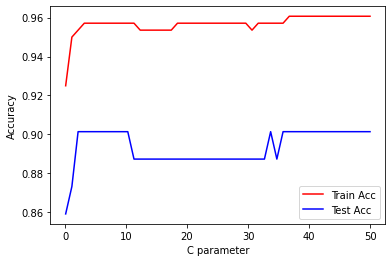

In [29]:
fig, ax = plt.subplots()
ax.plot(c_parameter, results['linear']['train_acc'], 'r', label='Train Acc')
ax.plot( c_parameter, results['linear']['test_acc'], 'b', label='Test Acc')
ax.legend()
plt.xlabel('C parameter')
plt.ylabel('Accuracy')

In [34]:
print('Maximum Training Accuracy', max(results['linear']['train_acc']))
print('Maximum Test Accuracy', max(results['linear']['test_acc']))

Maximum Training Accuracy 0.9607142857142857
Maximum Test Accuracy 0.9014084507042254


- For linear kernel the best value of 'C' is between 40-50 as that range has maximum training as well as testing accuracy

### Result of Quadratic kernel

Text(0, 0.5, 'Accuracy')

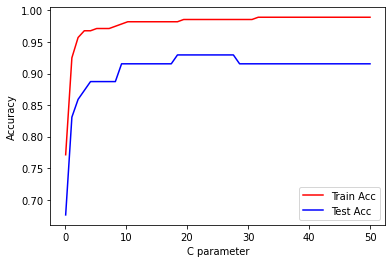

In [30]:
fig, ax = plt.subplots()
ax.plot(c_parameter, results['poly']['train_acc'], 'r', label='Train Acc')
ax.plot( c_parameter, results['poly']['test_acc'], 'b', label='Test Acc')
ax.legend()
plt.xlabel('C parameter')
plt.ylabel('Accuracy')

- For Quadratic kernel the best value of 'C' is between 18-25 as in that range it has maximum test accuracy
- For 35+ value of 'C' has higher training accuracy is higher but there is drop in test accuracy implying little bit overfitting, plus the rise in trainning accuracy is not that significant

### Result of RBF kernel

Text(0, 0.5, 'Accuracy')

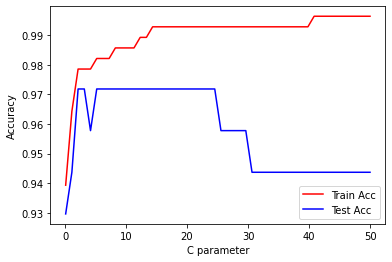

In [32]:
fig, ax = plt.subplots()
ax.plot(c_parameter, results['rbf']['train_acc'], 'r', label='Train Acc')
ax.plot( c_parameter, results['rbf']['test_acc'], 'b', label='Test Acc')
ax.legend()
plt.xlabel('C parameter')
plt.ylabel('Accuracy')

- For RBF kernel the best value of 'C' is between 15-25 as in that range it has maximum test accuracy
- For 25+ value of 'C' has higher training accuracy but there is large drop in test accuracy implying overfitting.

---

## Task 2

In [61]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import torch.nn as nn

In [45]:
data.iloc[:, 34] = data.iloc[:, 34].replace(['g','b'], [1, 0])
data.iloc[:, 34].head()

0    1
1    0
2    1
3    0
4    1
Name: 34, dtype: int64

In [93]:
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, 0:34], data.iloc[:, 34], test_size=0.20, random_state=222)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(280, 34)
(280,)
(71, 34)
(71,)


In [94]:
x_train = torch.Tensor(x_train.to_numpy())
x_test = torch.Tensor(x_test.to_numpy())
y_train = torch.Tensor(y_train.to_numpy().reshape(280,1))
y_test= torch.Tensor(y_test.to_numpy().reshape(71,1))

In [97]:
class MLP0(nn.Module):
    def __init__(self):
        super(MLP0, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(34, 1),
        )
        
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.layers(x)
        return torch.sigmoid(x)

    
class MLP1(nn.Module):
    def __init__(self, h):
        super(MLP1, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(34, h),
            nn.ReLU(),
            nn.Linear(h, 1)
        )
        
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.layers(x)
        return torch.sigmoid(x)



class MLP2(nn.Module):
    def __init__(self, h1, h2):
        super(MLP2, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(784, h1),
            nn.ReLU(),
            nn.Linear(h1, h2),
            nn.ReLU(),
            nn.Linear(h2, 1)
        )
        
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.layers(x)
        return torch.sigmoid(x)

In [102]:
# 0 hidden layer
learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.00001]
r_train = []
r_test = []

for lr in learning_rates:
  model = MLP0()
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  loss_fn = nn.BCELoss()

  epochs = 100
  for i in range(epochs):
    y_pred = model.forward(x_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_acc = accuracy_score(y_train, model.forward(x_train).detach().numpy())
  test_acc = accuracy_score(y_test, model.forward(x_test).detach().numpy())

  r_train.append(train_acc)
  r_test.append(test_acc)

fig, ax = plt.subplots()
ax.plot(learning_rates, r_train, 'r', label='Train Acc')
ax.plot( learning_rates, r_test, 'b', label='Test Acc')
ax.legend()
plt.xlabel('C parameter')
plt.ylabel('Accuracy')

ValueError: ignored